In [58]:
import pandas as pd
from pymongo import MongoClient
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [59]:
client=MongoClient("localhost",27017)

In [65]:
# Retrieve all documents from events collection
documents = collection.find().limit(10)
# Iterate over the documents
#for document in documents:
    #print(document)

In [60]:
db = client["educationDB"]
collection = db["educationCollection"]

In [83]:
query = {"Year": 2011}
documents = collection.find(query).sort([("Year")])

In [84]:
query = {"Year": 2011}
documents = collection.find(query).sort([("Year")])
count = 0
for document in documents:
    count += 1
    print(document)
print(count)

{'_id': ObjectId('66046fb336636ca837a416a3'), 'Indicator Name': 'School enrollment, primary, female (% net)', 'Indicator Code': 'SE.PRM.NENR.FE', 'Country Name': 'Arab World', 'Country Code': 'ARB', 'Year': 2011, 'Value': 81.39816, 'Disaggregation': 'female, Net'}
{'_id': ObjectId('66046fb336636ca837a416f5'), 'Indicator Name': 'School enrollment, primary, female (% net)', 'Indicator Code': 'SE.PRM.NENR.FE', 'Country Name': 'Central Europe and the Baltics', 'Country Code': 'CEB', 'Year': 2011, 'Value': 92.86517, 'Disaggregation': 'female, Net'}
{'_id': ObjectId('66046fb336636ca837a41710'), 'Indicator Name': 'School enrollment, primary, female (% net)', 'Indicator Code': 'SE.PRM.NENR.FE', 'Country Name': 'EAR', 'Country Code': 'EAR', 'Year': 2011, 'Value': 89.52529, 'Disaggregation': 'female, Net'}
{'_id': ObjectId('66046fb336636ca837a41752'), 'Indicator Name': 'School enrollment, primary, female (% net)', 'Indicator Code': 'SE.PRM.NENR.FE', 'Country Name': 'East Asia & Pacific', 'Countr

     _id  total_records    total_value     avg_val
0   1970            382   29762.626044   77.912634
1   1971            770   61570.576641   79.961788
2   1972            795   64423.564401   81.035930
3   1973            795   64781.293896   81.485904
4   1974            781   64770.418594   82.932674
5   1975            765   63867.858179   83.487396
6   1976            805   68123.320817   84.625243
7   1977            810   69225.159732   85.463160
8   1978            852   72681.247905   85.306629
9   1979            829   71429.948581   86.163991
10  1980            782   68186.847727   87.195457
11  1981            881   77194.796723   87.621790
12  1982            855   74751.576187   87.428744
13  1983            876   77496.910812   88.466793
14  1984            875   77579.729950   88.662549
15  1985            864   76492.324914   88.532783
16  1986            910   80676.883337   88.655916
17  1987            844   74808.305030   88.635433
18  1988            845   74428

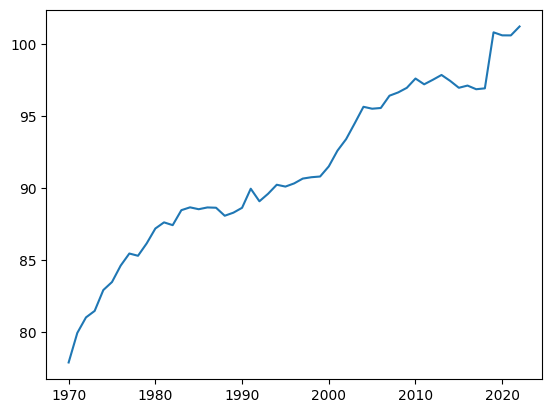

In [118]:
agg_result= collection.aggregate( 
    [
     { 
        "$group" :  
            {"_id" : "$Year",
             "total_records" : {"$sum" : 1},
             "total_value" : {"$sum" : "$Value"},
             "avg_val" : {"$avg" : "$Value"}
             }
     },
     { 
         "$sort": { "_id": 1 } 
     }
    ])
data = list(agg_result)
#print(data)
mongo_df = pd.DataFrame(data)
print(mongo_df)
print(mongo_df["total_records"])
plt.plot(mongo_df["_id"], mongo_df["avg_val"]) 

# function to show the plot 
plt.show()

#print(agg_result)
#for i in agg_result: 
#    print(i) 